## Import Library dan Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.bmi.fillna(df.bmi.mean(),inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

## Preprocessing Data

In [ ]:
def cat_col(data):
    var_name = []
    for col in data.columns:
        if data[col].dtype == object:
            var_name.append(col)
    return var_name

### Split Data and Encode Data

In [ ]:
df_x = df.drop(['stroke','id'], axis= 1)
df_y = df['stroke']

x_cat = cat_col(df_x)

#### Encode Data

In [ ]:
le = preprocessing.LabelEncoder()

for i in x_cat:
  df_x[i] = le.fit_transform(df_x[i])


X = df_x.astype(float).values
y = df_y.astype(float).values

#### Cek Korelasi

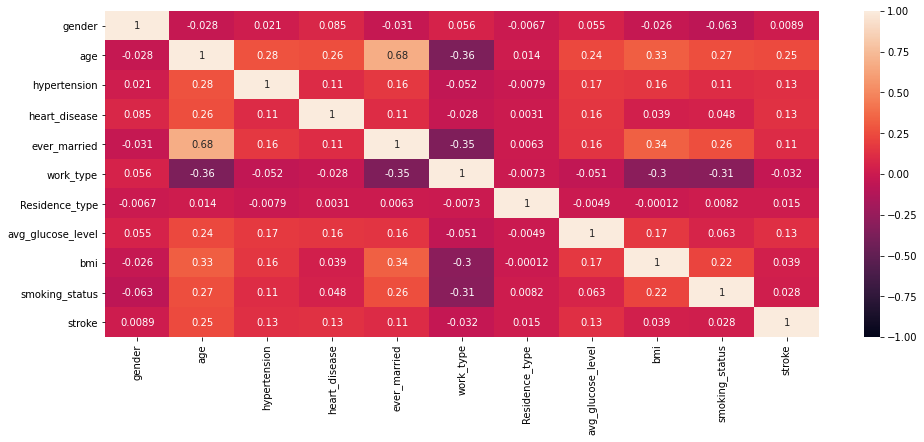

In [ ]:
df_cor = pd.concat([df_x.astype(float), df_y.astype(float)], axis= 1)
plt.figure(figsize=(16, 6))
sns.heatmap(df_cor.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

#### Distribusi Target Data

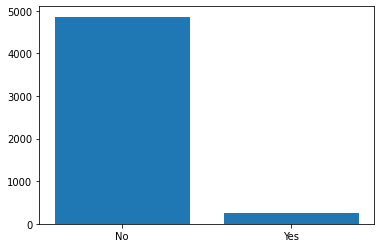

In [ ]:
stk = df.stroke.value_counts().reset_index()
label = ['No', 'Yes']
val = stk['stroke']

plt.bar(label,val)
plt.show()

#### Oversampling

In [ ]:
pip install imbalanced-learn

## 1. Model DT dengan seluruh Feature

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X.shape

(5110, 10)

In [ ]:
X_over.shape

(9722, 10)

#### Split, Train Machine Learning, Score

Acc 0.9777168323620158
Precision 0.9573770491803278
Recall 1.0
conf_matrix [[1392   65]
 [   0 1460]]


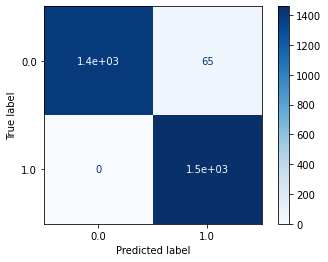

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acc', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('conf_matrix', confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## 2. DT dengan Feature Selection (Filtering method)

#### Feature Selection

[]

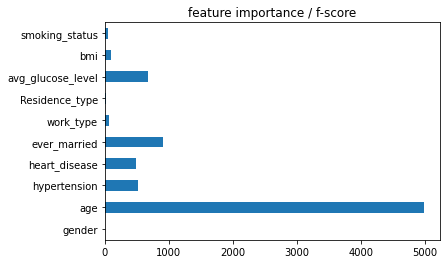

In [ ]:
filter = SelectKBest(f_classif, k=7)
X_new = filter.fit_transform(X_over,y_over)

feat_importance = pd.Series(filter.scores_, index = df_x.columns)
feat_importance.plot(kind='barh')
plt.title('feature importance / f-score')
plt.plot()

In [ ]:
X.shape

(5110, 10)

In [ ]:
X_over.shape

(9722, 10)

In [ ]:
X_new.shape

(9722, 7)

Acc 0.9784024682893384
Precision 0.958634274458306
Recall 1.0
conf_matrix [[1394   63]
 [   0 1460]]


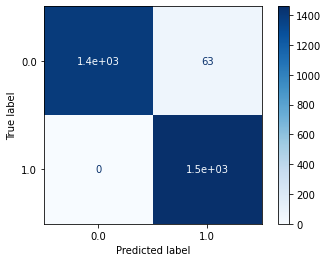

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_over, test_size = 0.3, random_state = 42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acc', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('conf_matrix', confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## 3. Feature yang optimal dari hasil filtering method yaitu:

*   age
*   ever_married
*   avg_glucose_level
*   hypertension
*   heart_disease
*   bmi
*   smoking_status

Dari hasil perbandingan 6 feature dan 7 feature. Ketika feature yang digunakan hanya 6, terjadi penurunan pada akuras, presisi, dan recall. Sedangkan ketika menggunakan feature sebanyak 7 dan 8 sama sekali tidak ada perbedaan dari score-nya.






## 4. Model DT + Feature Selection (Embedded Method)

#### Embedded dengan ExtraTree

Sebelum RFE (9722, 10)
Sesudah RFE (9722, 3)
Score of features [0.03650956 0.3652559  0.03866606 0.02984078 0.05327916 0.06198701
 0.03583187 0.16603887 0.1340014  0.07858939]


[]

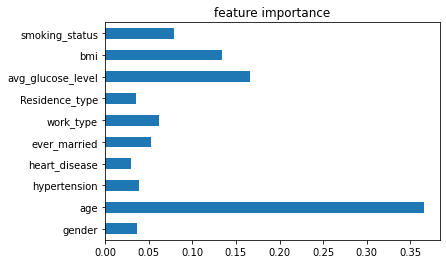

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X_over, y_over)

embed = SelectFromModel(clf, prefit=True)
X_new = embed.transform(X_over)

print('Sebelum RFE', X_over.shape)
print('Sesudah RFE', X_new.shape)
print('Score of features', clf.feature_importances_)

feat_importance = pd.Series(clf.feature_importances_, index = df_x.columns)
feat_importance.plot(kind='barh')
plt.title('feature importance')
plt.plot()

Acc 0.9688035653068221
Precision 0.9413281753707285
Recall 1.0
conf_matrix [[1366   91]
 [   0 1460]]


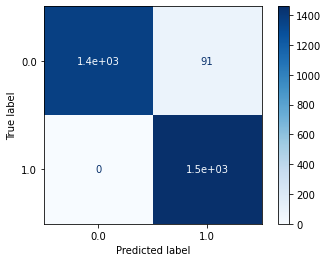

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_over, test_size = 0.3, random_state = 42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acc', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('conf_matrix', confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

#### Embedded dengan RandomForest

Sebelum RFE (9722, 10)
Sesudah RFE (9722, 3)
Score of features [0.02247401 0.39435399 0.02717087 0.0166161  0.0362361  0.04616297
 0.02121251 0.2064786  0.17832662 0.05096823]


[]

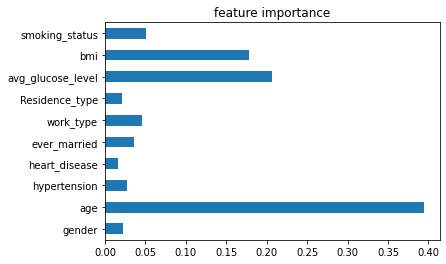

In [ ]:
clf2 = RandomForestClassifier()
clf2 = clf2.fit(X_over, y_over)

embed = SelectFromModel(clf2, prefit=True)
X_new = embed.transform(X_over)

print('Sebelum RFE', X_over.shape)
print('Sesudah RFE', X_new.shape)
print('Score of features', clf2.feature_importances_)

feat_importance = pd.Series(clf2.feature_importances_, index = df_x.columns)
feat_importance.plot(kind='barh')
plt.title('feature importance')
plt.plot()

Acc 0.9688035653068221
Precision 0.9413281753707285
Recall 1.0
conf_matrix [[1366   91]
 [   0 1460]]


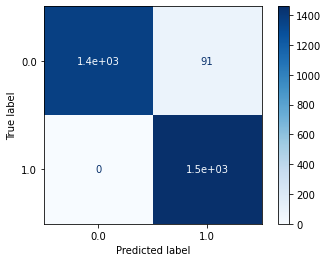

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_over, test_size = 0.3, random_state = 42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acc', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('conf_matrix', confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

## 5. Feature yang optimal pada hasil embedded method (ExtraTree dan RandomForest) yaitu: 

*   age
*   avg_glucose_level
*   bmi

